In [1]:
from data.create_data import *
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import statsmodels
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
data = read_frmgham()

# Distribution of Blood Pressure
Distributions describe a variable by reporting the values that appear in the dataset and how many times each value appears (*frequency*).

#### Research Question
1. Does blood pressure (systolic & diatolic) vary between current non-smokers & smokers?

## Blood Pressure
Prior clinical studies have demonstrated the negative impacts that smoking behavior has on an individual's health. More specifically, smoking is a proven risk factor for cardiovascular diseases such as heart attack, stroke, and hypertension (high blood pressure). 

The nicotine in cigarettes elevates one's blood pressure through the narrowing of arteries and hardening of walls. Subsequently, increasing the risk of blood clots.

Blood pressure is represented by two values: **systolic** blood pressure and **diastolic** blood pressure.
  * **Systolic blood pressure** is the pressure exerted against the artery walls when the heart beats while pumping blood.
  * **Diastolic blood pressure** is the pressure exerted against the artery walls when the heart is at rest between beats.

#### Normal Blood Pressure
Per the American Heart Association, a *normal* reading of blood pressure consists of a value between 90-120 mmHg and 60-80 mmHg for systolic and diastolic blood pressure, respectively.

#### Blood Pressure Category
| Category | Systolic BP (mmHg) | Diastolic BP (mmHg) |
|:---------|:------------------:|:-------------------:|
|Normal|< 120|< 80 |
|Prehypertension|120-139|80-89|
|High Blood Pressure (Hypertension) Stage 1|140-159|90-99|
|High Blood Pressure (Hypertension) Stage 2|>= 160| >= 100|
|Hypertensive Crisis| > 180| >110|

**High blood pressure** only requires alignment either systolic or diastolic blood pressure, not both.

In [3]:
smoke_bp = data[['cursmoke','sysbp', 'diabp']]
smoke_bp.isnull().sum()

cursmoke    0
sysbp       0
diabp       0
dtype: int64

No null (`nan`) values are present in the columns: `cursmoke` (smoking status), `sysbp` (systolic blood pressure), `diap` (diastolic blood pressure.

In [4]:
non_bp = smoke_bp[smoke_bp.cursmoke==0] 
cur_bp = smoke_bp[smoke_bp.cursmoke!=0]

non_bp.shape, cur_bp.shape

((6598, 3), (5029, 3))

The dataset contains a higher amount of non-smokers (n<sub>non-smokers</sub>=6598) than smokers (n<sub>smokers</sub>=5029) throughout the course of study.

## Frequency

In [5]:
def freq(sequence):
    """
    This function takes one parameter, a Python sequence, and returns
    a dictionary of frequencies for each respective value (histogram).
    
    :param sequence: A Python sequence of values 
    
    :return: A dictionary of (value: frequency)
    """
    hist = {}
    for x in sequence:
        hist[x] = hist.get(x, 0) + 1
    return hist

Below are Python dictionaries of systolic and diastolic blood pressure frequencies in correspondence to the patient's current smoking status at the time of the examination (non-smoker or active smoker).

In [6]:
# Systolic Blood Pressure
hist_nonsys = freq(non_bp.sysbp)
hist_cursys = freq(cur_bp.sysbp)

# Diastolic Blood Pressure
hist_nondia = freq(non_bp.diabp)
hist_curdia = freq(cur_bp.diabp)

### Histogram
Histograms are visualizations of the frequencies for each value. They are useful as they make the most frequent values immediately apprent.

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


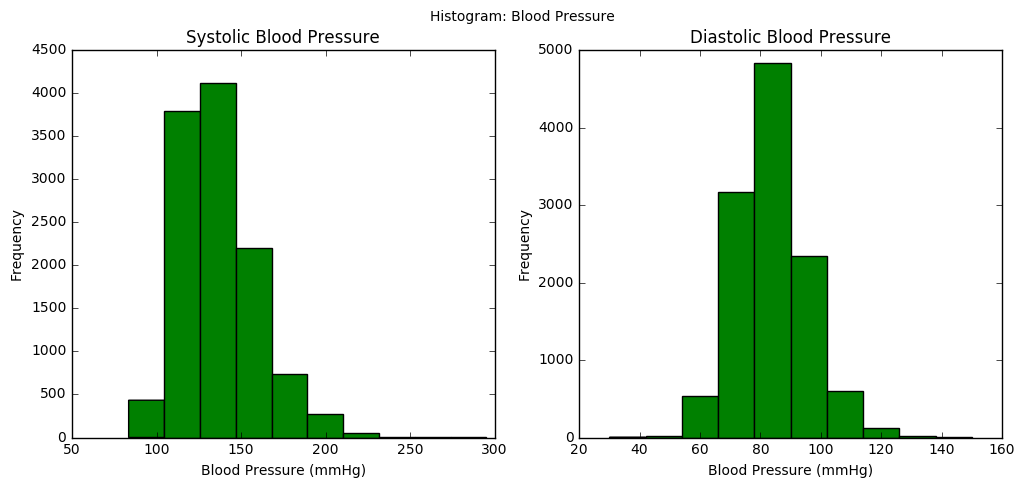

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.hist(smoke_bp.sysbp, color='g')
plt.title("Systolic Blood Pressure")
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.hist(smoke_bp.diabp, color='g')
plt.title("Diastolic Blood Pressure")
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.suptitle('Histogram: Blood Pressure')

plt.show()

Both distributions (systolic and diastolic blood pressure) have an approximately right or positive skewed distribution shape. The magnitude of the right-skewedness is greater for systolic blood pressure as majority of the patients have a normal systolic blood pressure range.

The diastolic blood pressure distribution has its values mostly within the borderline of the normal and hypertensive blood pressure range. It also has a greater frequency of patients with prehypertension and hypetension. Hence, indicating that high blood pressure of diagnosed patients are mostly likely due to elevated diastolic blood pressure.

### Non-Smokers vs. Smokers

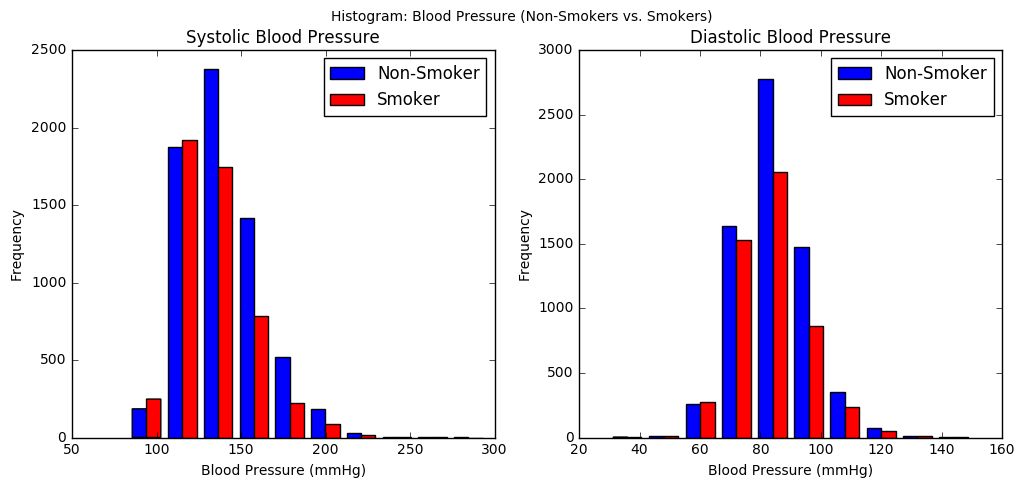

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist([non_bp.sysbp, cur_bp.sysbp], color=['b','r'],
         label=['Non-Smoker','Smoker'])
plt.title("Systolic Blood Pressure")
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.hist([non_bp.diabp, cur_bp.diabp], color=['b','r'],
         label=['Non-Smoker','Smoker'])
plt.title("Diastolic Blood Pressure")
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.suptitle('Histogram: Blood Pressure (Non-Smokers vs. Smokers)')
plt.show()

For both systolic and diastolic blood pressure, non-smokers have an overall higher frequency. This may be due to their larger population size as more respondents were non-smokers during the study.

#### Systolic Blood Pressure
Both distributions (non-smokers and active smokers) are skewed right (positive skew). Thus, indicating that the mean of systolic blood pressure (`sysbp`) tends to be greater than the median in each respective distribution.

Majority of the population for both groups are approximately borderline normal or prehypertensive in regards to their blood pressure categorization. In other words, most of the values center around th **mode** of 120 mmHg. Fewer are pre-hypertensive and gradually fewer for the next subsequent blood pressure categorizations.

#### Diastolic Blood Pressure
Both distributions of diastolic blood pressure (`diabp`) have an approximately right-skewed distribution, though not as drastic as those for systolic blood pressure. This distribution somewhat resembles a normal distribution.

Like systolic blood pressure, majority of the population for both groups have normal blood pressure. Fewer have prehypertension and gradually less for the next levels of blood pressure categories. Though, the diastolic blood pressure distribution highlights that there is a higher proportion of prehypertension and hypertension stage 1 patients due to elevated diastolic blood pressure.

In [9]:
mode_nonsys = non_bp.sysbp.mode().iloc[0]
mode_cursys = cur_bp.sysbp.mode().iloc[0]
mode_nondia = non_bp.diabp.mode().iloc[0]
mode_curdia = cur_bp.diabp.mode().iloc[0]
print "Mode Sys BP (non-smoker) = %d" % mode_nonsys
print "Mode Sys BP (smoker) = %d" % mode_cursys
print "Mode Dia BP (non-smoker) = %d" % mode_nondia
print "Mode Dia BP (smoker) = %d" % mode_curdia

Mode Sys BP (non-smoker) = 120
Mode Sys BP (smoker) = 120
Mode Dia BP (non-smoker) = 80
Mode Dia BP (smoker) = 80


The **mode** of systolic blood pressure for both non-smokers and smokers is 120 mmHg. Similarly, the **mode** of diastolic blood pressure for both groups are 80 mmHg.

Thus, both non-smokers and smokers are borderline normal for their blood pressure.

## Descriptive Statistics
Statistics summarizing the distributions by quantifying some aspect of the distribution.
#### Mean, Median, Standard Deviation, & Variance

In [10]:
mean_nonsys, mean_cursys = non_bp.sysbp.mean(), cur_bp.sysbp.mean()
mean_nondia, mean_curdia = non_bp.diabp.mean(), cur_bp.diabp.mean()
med_nonsys, med_cursys = non_bp.sysbp.median(), cur_bp.sysbp.median()
med_nondia, med_curdia = non_bp.diabp.median(), cur_bp.diabp.median()

print "Systolic Blood Pressure"
print "Non-Smoker: mean = %.2f; median = %.2f" % (mean_nonsys, med_nonsys)
print "Current Smoker: mean = %.2f; median = %.2f" % (mean_cursys, med_cursys)
print "\n", "Diastolic Blood Pressure"
print "Non-Smoker: mean = %.2f; median = %.2f" % (mean_nondia, med_nondia)
print "Current Smoker: mean = %.2f; median = %.2f" % (mean_curdia, med_curdia)

Systolic Blood Pressure
Non-Smoker: mean = 139.13; median = 135.00
Current Smoker: mean = 132.65; median = 129.00

Diastolic Blood Pressure
Non-Smoker: mean = 83.81; median = 83.00
Current Smoker: mean = 82.02; median = 81.00


Conforming with the shape of their similarly right-skewed distributions, the mean is greater than the median for each group.

It should be noted that ironically, current smokers have slightly lower systolic and diastolic blood pressures on average compared to their non-smoking counterparts. Thus, countering with what's generally accepted in the medical domain (smoking is linked to high blood pressure).

In [11]:
var_nonsys, var_cursys = non_bp.sysbp.var(), cur_bp.sysbp.var()
var_nondia, var_curdia = non_bp.diabp.var(), cur_bp.diabp.var()
std_nonsys, std_cursys = non_bp.sysbp.std(), cur_bp.sysbp.std()
std_nondia, std_curdia = non_bp.diabp.std(), cur_bp.diabp.std()

print "Systolic Blood Pressure"
print "Non-Smoker: variance = %.2f; standard deviation = %.2f" % (var_nonsys, std_nonsys)
print "Current Smoker: variance = %.2f; standard deviation = %.2f" % (var_cursys, std_cursys)
print "\n", "Diastolic Blood Pressure"
print "Non-Smoker: variance = %.2f; standard deviation = %.2f" % (var_nondia, std_nondia)
print "Current Smoker: variance = %.2f; standard deviation = %.2f" % (var_curdia, std_curdia)

Systolic Blood Pressure
Non-Smoker: variance = 537.39; standard deviation = 23.18
Current Smoker: variance = 472.96; standard deviation = 21.75

Diastolic Blood Pressure
Non-Smoker: variance = 134.18; standard deviation = 11.58
Current Smoker: variance = 136.51; standard deviation = 11.68


It's expected that non-smokers have deviations of 23 mmHg and 11-12 mmHg from their mean for their systolic and diastolic blood pressure, respectively.

Likewise, smokers may have deviations of 21-22 mmHg and 11-12 mmHg from their mean for their systolic and diastolic blood pressure, respectively.

#### Effect Size
A summary statistic describing the size of an effect such as the difference between two groups.

In [12]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [13]:
d_sys = CohenEffectSize(non_bp.sysbp, cur_bp.sysbp)
d_dia = CohenEffectSize(non_bp.diabp, cur_bp.diabp)

print "Cohen's d systolic = %.2f" % d_sys
print "Cohen's d diastolic = %.2f" % d_dia

Cohen's d systolic = 0.29
Cohen's d diastolic = 0.15


The `Cohen's d statistic` for systolic blood pressure and diastolic blood pressure are 0.29 and 0.15, respectively. In other words, the difference between non-smokers and smokers in their means are 0.29 and 0.15 standard deviations for systolic and diastolic blood pressure, respectively.

In [14]:
diffm_sys = non_bp.sysbp.mean() - cur_bp.sysbp.mean()
diffm_dia = non_bp.diabp.mean() - cur_bp.diabp.mean()

print "Difference in Means Systolic = %.2f" % diffm_sys
print "Difference in Means Diastolic = %.2f" % diffm_dia

Difference in Means Systolic = 6.48
Difference in Means Diastolic = 1.79


The difference in means between non-smokers and smokers are 6.48 mmHg for systolic blood pressure and 1.79 mmHg for diastolic blood pressure.

## Probability Mass Functions
Probability mass functions (PMF) are another way to represent distribution by mapping each value to its *probability*.

Probabiltiy is a frequency expressed as a fraction of the sample size (`n`). Thus, probabilities of each value of obtained by normailizing their respective frequencies.

In [15]:
def pmf(dictionary):
    """Takes a histogram dictionary (frequency) and 
    create a PMF dictionary (probabilities).
    
    """
    n = float(sum(dictionary.values()))
    pmf_d = {}

    for x,freq in dictionary.items():
        pmf_d[x] = freq / n
    return pmf_d

In [16]:
# Systolic Blood Pressure
pmf_nonsys = pmf(hist_nonsys)
pmf_df_nonsys = pd.DataFrame(pmf_nonsys.items(), 
                   columns=['sysbp', 'p']).sort_values('sysbp')
pmf_cursys = pmf(hist_cursys)
pmf_df_cursys = pd.DataFrame(pmf_cursys.items(), 
                   columns=['sysbp', 'p']).sort_values('sysbp')



# Diastolic Blood Pressure
pmf_nondia = pmf(hist_nondia)
pmf_df_nondia = pd.DataFrame(pmf_nondia.items(), 
                   columns=['diabp', 'p']).sort_values('diabp')
pmf_curdia = pmf(hist_curdia)
pmf_df_curdia = pd.DataFrame(pmf_curdia.items(), 
                   columns=['diabp', 'p']).sort_values('diabp')

### PMF Plots
Plotting distributions of a variable by its probability will enable a much more accurate comparison of two distributions. This is possible due to the inherent normalization of PMFs, preventing any possibility of being mislead by the difference in the sample size.

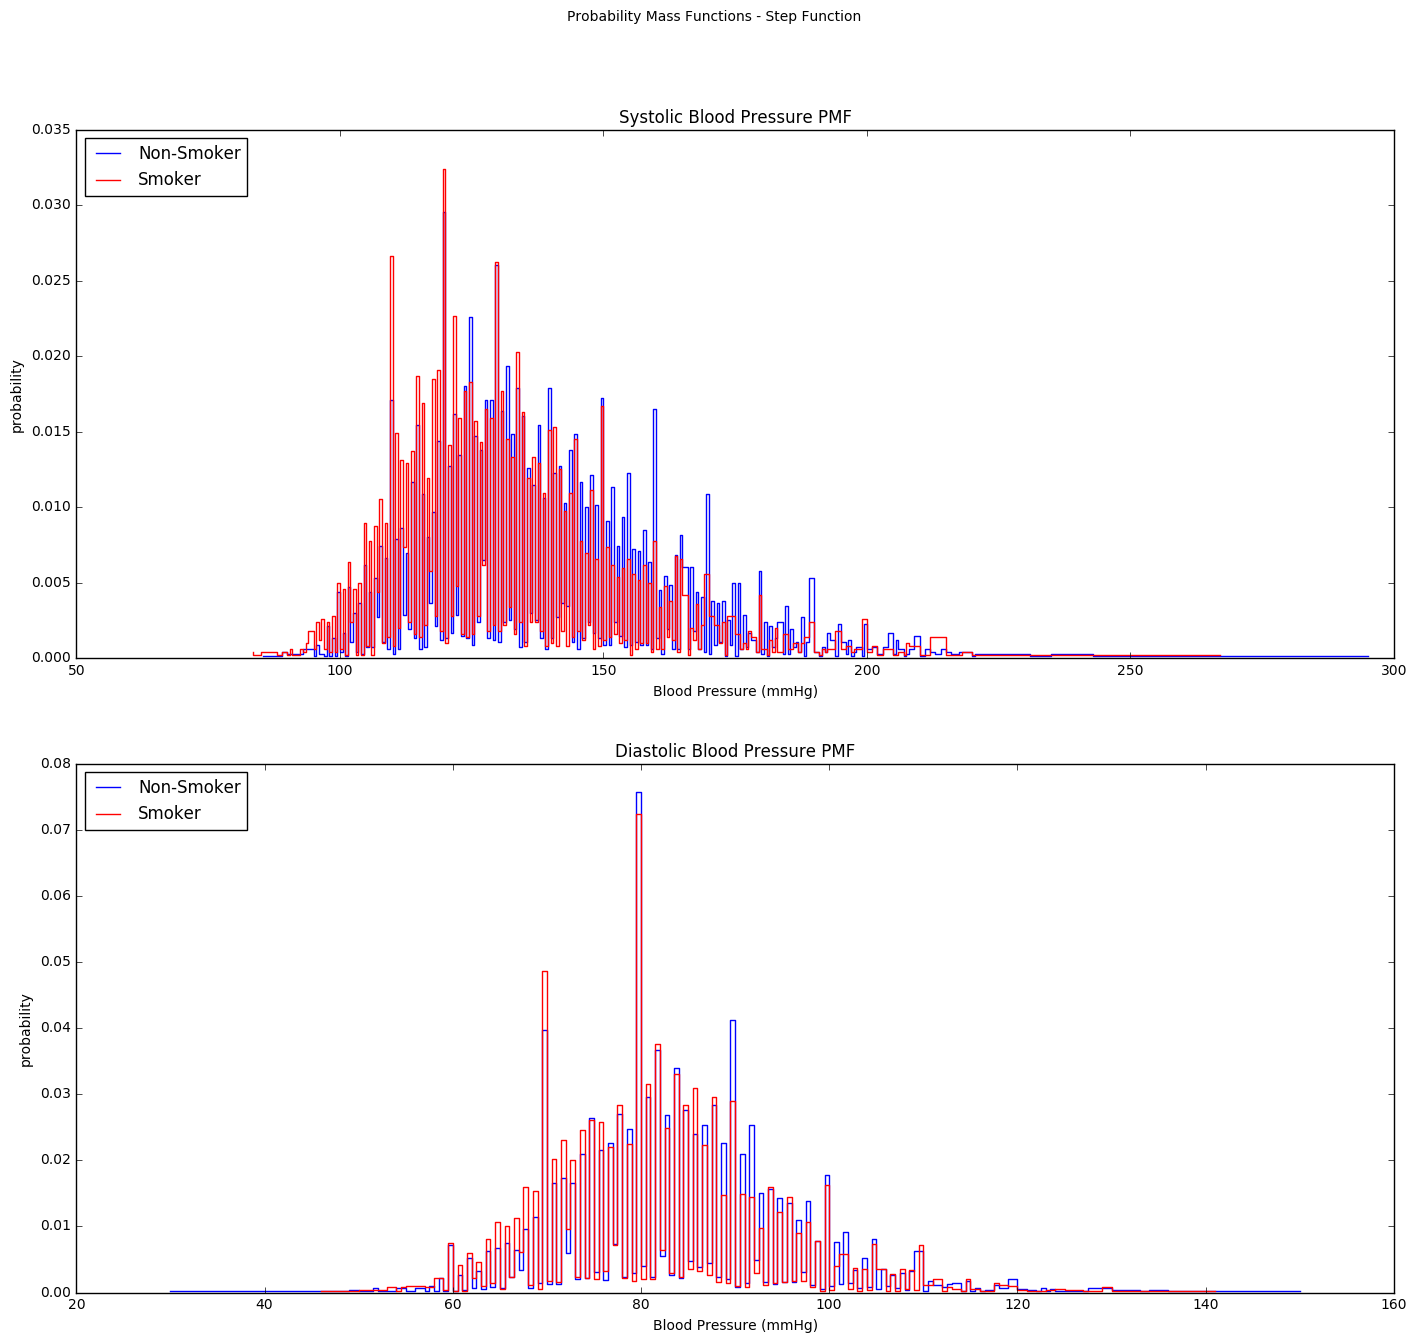

In [17]:
plt.figure(figsize=(17,15))
plt.subplot(2,1,1)
plt.step(pmf_df_nonsys.sysbp, pmf_df_nonsys.p, color='blue',
         label='Non-Smoker')
plt.step(pmf_df_cursys.sysbp, pmf_df_cursys.p, color='red', 
         label='Smoker',)
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('probability')
plt.title('Systolic Blood Pressure PMF')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.step(pmf_df_nondia.diabp, pmf_df_nondia.p, color='blue', 
         label='Non-Smoker')
plt.step(pmf_df_curdia.diabp, pmf_df_curdia.p, color='red', 
         label='Smoker',)
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('probability')
plt.title('Diastolic Blood Pressure PMF')
plt.legend(loc='upper left')
plt.suptitle('Probability Mass Functions - Step Function')

plt.show()

The step function of systolic blood pressure probabilities illustrate that non-smokers within this study population generally have slightly higher probabilities of being diagnosed with more severe categories of blood pressure.

On the contrary, the step function of the diastolic blood pressure probabilities suggests that there is no major difference between non-smokers and active smokers. The plot shows that the highest probability is around 80 mmHg (normal blood pressure. It should be noted that a large proportion of the distribution is within the range of 80-100 mmHg, indicating a fairly large prevalence of prehypertension and hypertension.

### Difference in PMFs
Clarify differences between two groups' probability mass functions by zooming in on on a particular range and transforming the data.

#### Normal Blood Pressure
  * Systolic BP: [80,120]  
  * Diastolic BP: [60,80]

In [18]:
def diff_pmf(low, high, sequence1, sequence2):
    """
    Function takes four parameters, two sequences and a range 
    consisting of low and high values. It returns a dictionary of 
    the difference in probabilities (PMF) for each value of
    the sequences.
    
    :param low: low value of range
    :param high: high value of range
    :param sequence1: sequence of values
    :param sequence2: sequence of values
    
    :return: dict of probability differences
    """
    if type(low) == int:
        rng = range(low, high)
    else:
        rng = np.arange(low, high, 0.5)
    diffs = {}
    for x in rng:
        if x in sequence1 and x in sequence2:
            p1 = sequence1[x]
            p2 = sequence2[x]
            diff = 100 * (p1 - p2)
            diffs[x] = diff
        else:
            continue
    return diffs

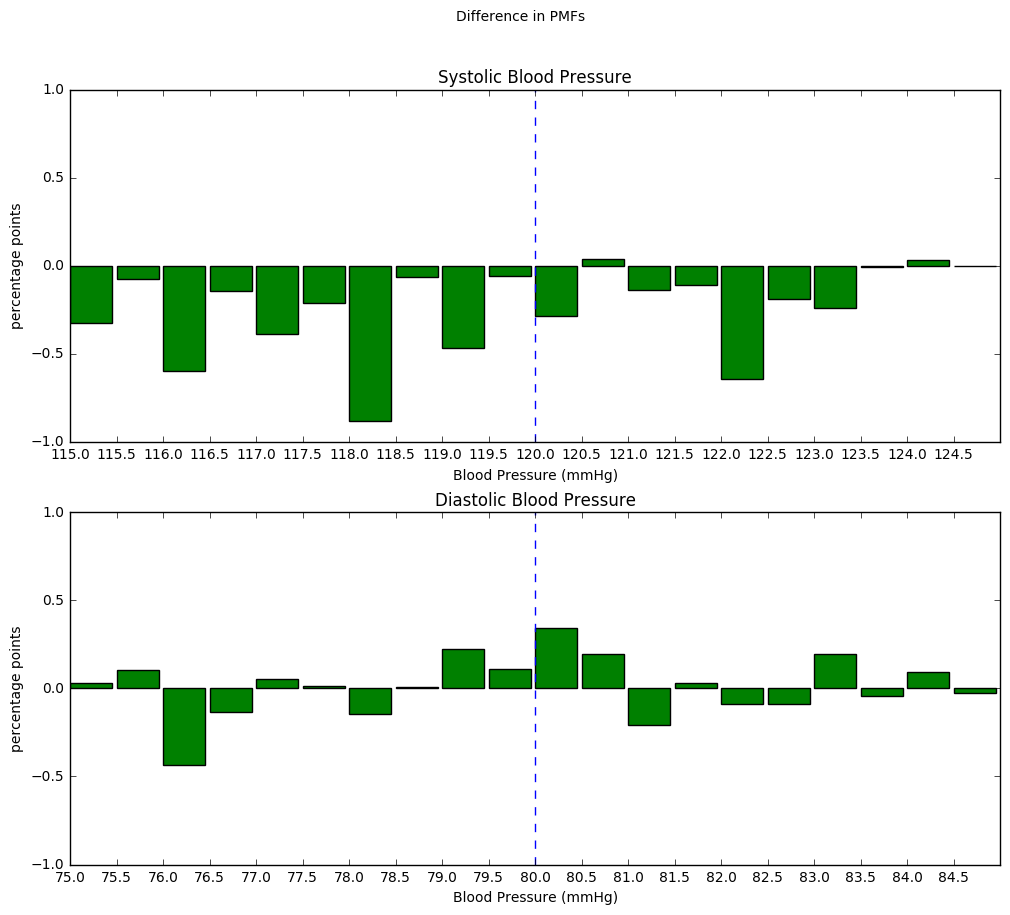

In [19]:
diff_sys = diff_pmf(115.0, 125.0, pmf_nonsys, pmf_cursys)
diff_dia = diff_pmf(75.0, 85.0, pmf_nondia, pmf_curdia)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.bar(diff_sys.keys(), diff_sys.values(), width=0.45, color='g')
plt.plot((120, 120), (-1.0, 1.0), '--') # cut-off between BP category
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('percentage points')
plt.xlim([115, 125])
plt.ylim([-1.0, 1.0])
plt.xticks(np.arange(115, 125, 0.5))
plt.title('Systolic Blood Pressure')

plt.subplot(2,1,2)
plt.bar(diff_dia.keys(), diff_dia.values(), width=0.45, color='g')
plt.plot((80, 80), (-1.0, 1.0), '--') # cut-off between BP category
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('percentage points')
plt.xlim([75, 85])
plt.ylim([-1.0, 1.0])
plt.xticks(np.arange(75, 85, 0.5))
plt.title('Diastolic Blood Pressure')
plt.suptitle('Difference in PMFs')
plt.show()

Non-smokers have a lower probability for systolic blood pressure in both the normal blood pressure range ([115, 120]) and prehypertension ([120, 125]). For diastolic blood pressure probabilities, there are no consistent trends as the differences are sporadic between non-smokers and smokers.

**Conclusion**  
Probability Mass Functions are not appropriate for this analysis as it is inept to handle variables with a large number of values. The effect of random noise is too high, making it difficult to draw appropriate inferences from the PMFs.

## Cumulative Distribution Functions
Cumulative distribution functions (CDF) serves as an alternative solution to viewing the distribution of data by its probabilities. As opposed to probability mass functions, CDFs relies on analyzing the *cumulative* probabilities by mapping a value (*percentile*) to its percentile rank.

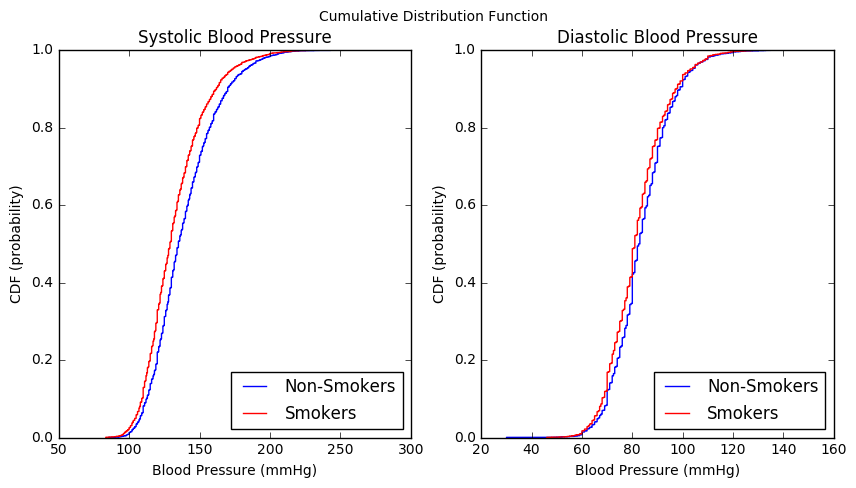

In [20]:
# CDF Systolic BP
cdf_nonsys = ECDF(non_bp.sysbp)
cdf_cursys = ECDF(cur_bp.sysbp)

# CDF Systolic BP
cdf_nondia = ECDF(non_bp.diabp)
cdf_curdia = ECDF(cur_bp.diabp)

# Plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.step(cdf_nonsys.x, cdf_nonsys.y, color='b', 
         label='Non-Smokers')
plt.step(cdf_cursys.x, cdf_cursys.y, color='r', 
         label='Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF (probability)')
plt.title('Systolic Blood Pressure')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.step(cdf_nondia.x, cdf_nondia.y, color='b', 
         label='Non-Smokers')
plt.step(cdf_curdia.x, cdf_curdia.y, color='r', 
         label='Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF (probability)')
plt.title('Diastolic Blood Pressure')
plt.legend(loc='lower right')
plt.suptitle('Cumulative Distribution Function')
plt.show()

Smokers have a slightly lower systolic and diastolic blood pressure throughout the distribution. The differences between the two groups are much more minimal and align closely for the distribution of CDF for diastolic blood pressure.

Majority of non-smokers and smokers have a systolic blood pressure value in approximately the range 120-180 mmHg (mode=120) and diastolic blood pressure value in approximately in the range 70-90 mmHg (mode=80).

Lastly, the sigmoid shape of the CDF curves suggest that the empirical CDF values resemble a normal distribution model.

In [21]:
print """Percentile Rank of Non-Smokers' Median 
    Systolic BP = %.2f""" % cdf_nonsys(135) + "%"
print """Percentile Rank of Smokers' Median 
    Systolic BP = %.2f""" % cdf_cursys(129) + "%"
print """Percentile Rank of Non-Smokers' Median 
    Diastolic BP = %.2f""" % cdf_nondia(83) + "%"
print """Percentile Rank of Smokers' Median 
    Diastolic BP = %.2f""" % cdf_curdia(81) + "%"

Percentile Rank of Non-Smokers' Median 
    Systolic BP = 0.51%
Percentile Rank of Smokers' Median 
    Systolic BP = 0.50%
Percentile Rank of Non-Smokers' Median 
    Diastolic BP = 0.53%
Percentile Rank of Smokers' Median 
    Diastolic BP = 0.52%


The median values for each group's systolic and diastolic blood pressure have a percentile rank of approximately 50%. Thus, supporting the previously calculated median values.

## Analytical Distributions
As previously discussed, the sigmoid shape of the CDF curves, based on the empirical data, indicates that the data's distribution resembles a normal distribution model.

The empirical CDF values will be compared to those of a normal distribution model, which will be computed based on the empirical mean and standard deviation.

|Blood Pressure|Mean|Standard Deviation|
|:-------------|:--:|:----------------:|
|Non-Smoker Systolic|139.13|23.18|
|Smoker Systolic|132.65|21.75|
|Non-Smoker Diastolic|83.81|11.58|
|Smoker Diastolic|82.02|11.68|

### Normal Distribution (Gaussian)

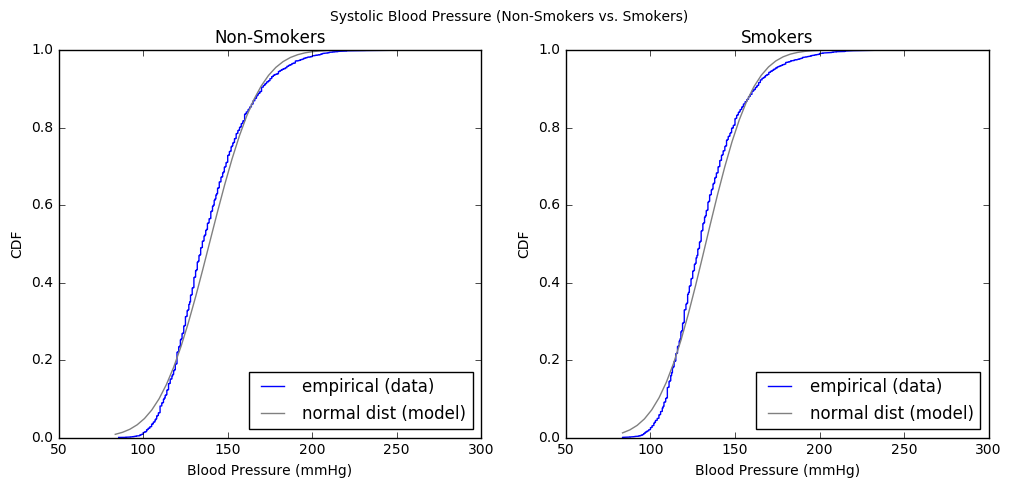

In [22]:
x_sys = np.linspace(83.5, 295, 50) 
ncdf_nonsys = scipy.stats.norm.cdf(x_sys,  
                                loc=139.13, # sample mean
                                scale=23.18) # sample std
ncdf_cursys = scipy.stats.norm.cdf(x_sys,  
                                loc=132.65, # sample mean
                                scale=21.75) # sample std
# Plot
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(cdf_nonsys.x, cdf_nonsys.y,
       label = 'empirical (data)')
plt.plot(x_sys, ncdf_nonsys,
         color = 'grey',
        label = 'normal dist (model)')
plt.title('Non-Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(cdf_cursys.x, cdf_cursys.y,
       label = 'empirical (data)')
plt.plot(x_sys, ncdf_cursys,
         color = 'grey',
        label = 'normal dist (model)')
plt.title('Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF')
plt.legend(loc='lower right')
plt.suptitle('Systolic Blood Pressure (Non-Smokers vs. Smokers)')

plt.show()

Both groups follow similar trends, when comparing their distributions against the normal distribution model. The discrepancies are as follows:
  * Less non-smokers and smokers have a normal systolic blood pressure value than expected in a normal distribution within the sample.
  * More non-smokers and smokers have a systolic blood pressure value within the Prehypertension or Hypertension Stage 1 range than expected.
  * Less non-smokers and smokers have Hypertension Stage 2 or High Blood Pressure Crisis than expected.

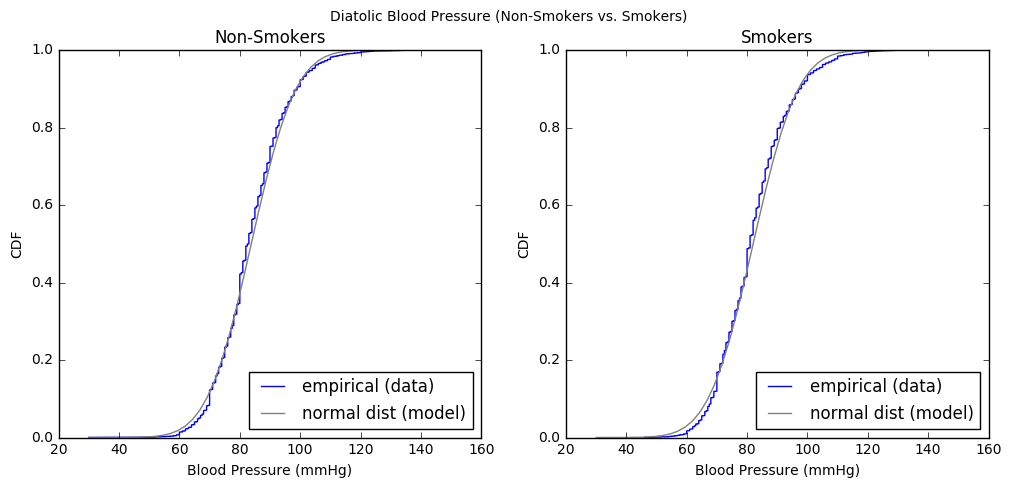

In [23]:
x_dia = np.linspace(30, 150, 50) 
ncdf_nondia = scipy.stats.norm.cdf(x_dia,  
                                loc=83.81, # sample mean
                                scale=11.58) # sample std
ncdf_curdia = scipy.stats.norm.cdf(x_dia,  
                                loc=82.02, # sample mean
                                scale=11.68) # sample std
# Plot
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(cdf_nondia.x, cdf_nondia.y,
       label = 'empirical (data)')
plt.plot(x_dia, ncdf_nondia,
         color = 'grey',
        label = 'normal dist (model)')
plt.title('Non-Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(cdf_curdia.x, cdf_curdia.y,
       label = 'empirical (data)')
plt.plot(x_dia, ncdf_curdia,
         color = 'grey',
        label = 'normal dist (model)')
plt.title('Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF')
plt.legend(loc='lower right')
plt.suptitle('Diatolic Blood Pressure (Non-Smokers vs. Smokers)')

plt.show()

Similarly, both groups closely resembles a normal distribution model. Though minor discrepancies with the analytical distribution model include:
  * Less non-smokers and smokers have low diatolic blood pressure (Hypotension) than expected in a normal distribution. This discrepancy is more apprent with smokers.
  * There are slightly less smokers with normal diastolic blood pressure than expected.
  * Slightly less smokers have Prehypertension and High Blood Pressure.

In [24]:
def NormalProbability(sample):
    """Generates data for a normal probability plot.

    sample: sequence of values

    returns: sorted numpy arrays sample, random
    """
    n = len(sample)
    random = np.random.normal(0, 1, n)
    random.sort()
    
    sample_copy = sample.copy()
    sample_copy.sort()

    return random, sample_copy

def FitLine(xs, inter, slope):
    """Fits a line to the given data.

    xs: sequence of x

    returns: tuple of numpy arrays (sorted xs, fit ys)
    """
    xs_copy = xs[:]
    fit_xs = np.sort(xs_copy)
    fit_ys = inter + slope * fit_xs # y=mx+b
    return fit_xs, fit_ys

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


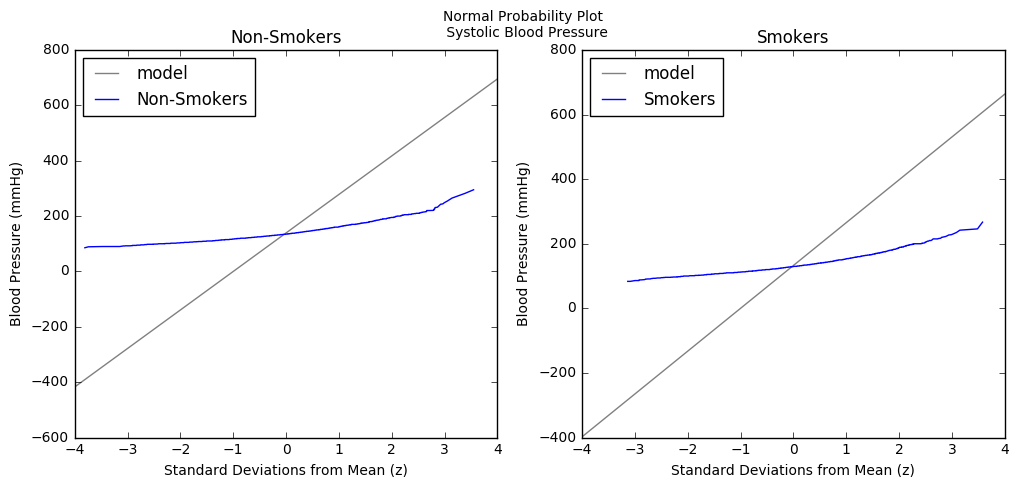

In [25]:
x_nonsys, y_nonsys = NormalProbability(non_bp.sysbp)
x_cursys, y_cursys = NormalProbability(cur_bp.sysbp)

xs = [-4, 4]

# normal distribution line (model)
fitnsys_xs, fitnsys_ys = FitLine(xs, inter=mean_nonsys, slope=mean_nonsys)
fitcsys_xs, fitcsys_ys = FitLine(xs, inter=mean_cursys, slope=mean_cursys)

# normal probability plots
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fitnsys_xs, fitnsys_ys, color='grey', label='model')
plt.plot(x_nonsys, y_nonsys, label='Non-Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(fitcsys_xs, fitcsys_ys, color='grey', label='model')
plt.plot(x_cursys, y_cursys, label='Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Smokers')
plt.legend(loc='upper left')
plt.suptitle('Normal Probability Plot \n Systolic Blood Pressure')

plt.show()

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


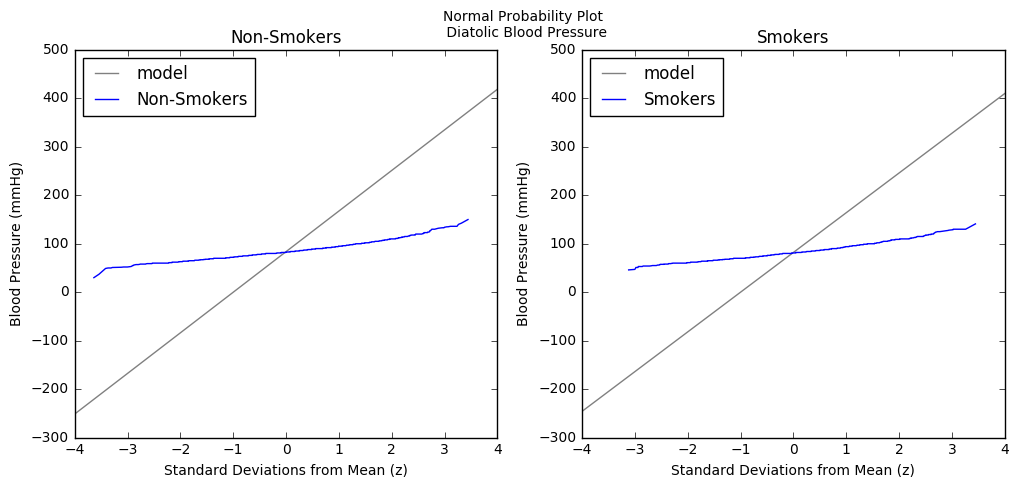

In [26]:
x_nondia, y_nondia = NormalProbability(non_bp.diabp)
x_curdia, y_curdia = NormalProbability(cur_bp.diabp)

xs = [-4, 4]

# normal distribution line (model)
fitndia_xs, fitndia_ys = FitLine(xs, inter=mean_nondia, slope=mean_nondia)
fitcdia_xs, fitcdia_ys = FitLine(xs, inter=mean_curdia, slope=mean_curdia)

# normal probability plots
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fitndia_xs, fitndia_ys, color='grey', label='model')
plt.plot(x_nondia, y_nondia, label='Non-Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(fitcdia_xs, fitcdia_ys, color='grey', label='model')
plt.plot(x_curdia, y_curdia, label='Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Smokers')
plt.legend(loc='upper left')
plt.suptitle('Normal Probability Plot \n Diatolic Blood Pressure')

plt.show()

The Normal Probability Plot serves as a complementary plot to the Normal Distribution model. The lack of alignment between both groups for systolic and diastolic blood pressures demonstrates that the normal distribution model may not be appropriate after all.

### Lognormal Distribution

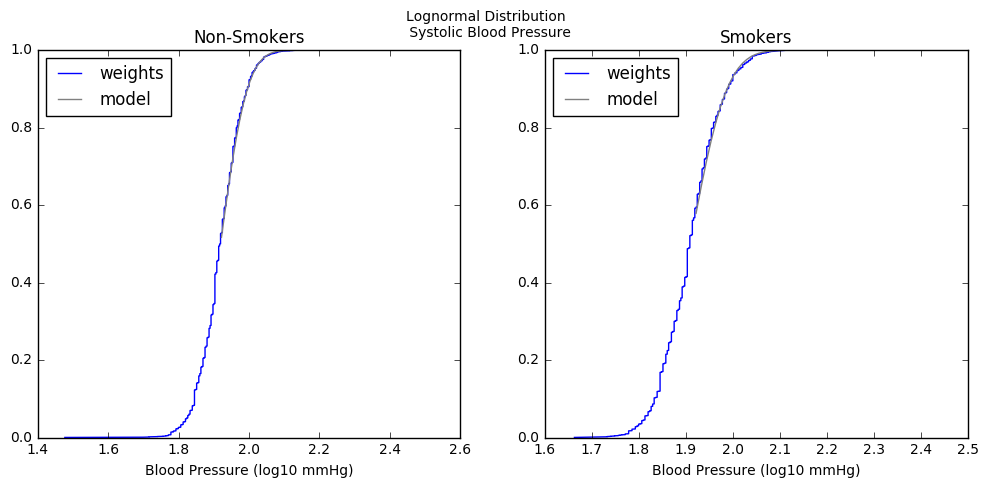

In [27]:
log_nonsys = np.log10(non_bp.diabp)
log_cursys = np.log10(cur_bp.diabp)

ecdf_lognonsys = ECDF(log_nonsys)
ecdf_logcursys = ECDF(log_cursys)

logx_sys = np.log10(np.linspace(83.5, 295, 100)) # random values
ncdf_lognonsys = scipy.stats.norm.cdf(logx_sys, 
                                      loc=log_nonsys.mean(),
                                      scale=log_nonsys.std())
ncdf_logcursys = scipy.stats.norm.cdf(logx_sys, 
                                      loc=log_cursys.mean(),
                                      scale=log_cursys.std())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ecdf_lognonsys.x, ecdf_lognonsys.y, 
         label = 'weights') # empirical CDF of log values
plt.plot(logx_sys, ncdf_lognonsys, 
         color = 'grey', label = 'model') # CDF normal distribution of log values
plt.xlabel('Blood Pressure (log10 mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(ecdf_logcursys.x, ecdf_logcursys.y, 
         label = 'weights') # empirical CDF of log values
plt.plot(logx_sys, ncdf_logcursys, color = 'grey', 
         label = 'model') # CDF normal distribution of log values
plt.xlabel('Blood Pressure (log10 mmHg)')
plt.title('Smokers')
plt.legend(loc='upper left')
plt.suptitle('Lognormal Distribution \n Systolic Blood Pressure')

plt.show()

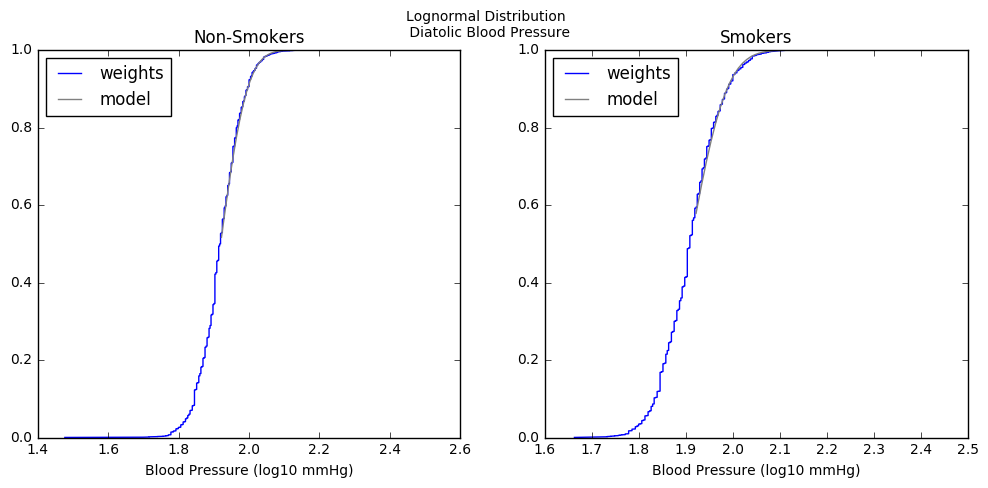

In [28]:
log_nondia = np.log10(non_bp.diabp)
log_curdia = np.log10(cur_bp.diabp)

ecdf_lognondia = ECDF(log_nondia)
ecdf_logcurdia = ECDF(log_curdia)

logx_dia = np.log10(np.linspace(83.5, 295, 100)) # random values
ncdf_lognondia = scipy.stats.norm.cdf(logx_dia, 
                                      loc=log_nondia.mean(),
                                      scale=log_nondia.std())
ncdf_logcurdia = scipy.stats.norm.cdf(logx_dia, 
                                      loc=log_curdia.mean(),
                                      scale=log_curdia.std())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ecdf_lognondia.x, ecdf_lognondia.y, 
         label = 'weights') # empirical CDF of log values
plt.plot(logx_dia, ncdf_lognondia, 
         color = 'grey', label = 'model') # CDF normal distribution of log values
plt.xlabel('Blood Pressure (log10 mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(ecdf_logcurdia.x, ecdf_logcurdia.y, 
         label = 'weights') # empirical CDF of log values
plt.plot(logx_dia, ncdf_logcurdia, color = 'grey', 
         label = 'model') # CDF normal distribution of log values
plt.xlabel('Blood Pressure (log10 mmHg)')
plt.title('Smokers')
plt.legend(loc='upper left')
plt.suptitle('Lognormal Distribution \n Diatolic Blood Pressure')

plt.show()

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


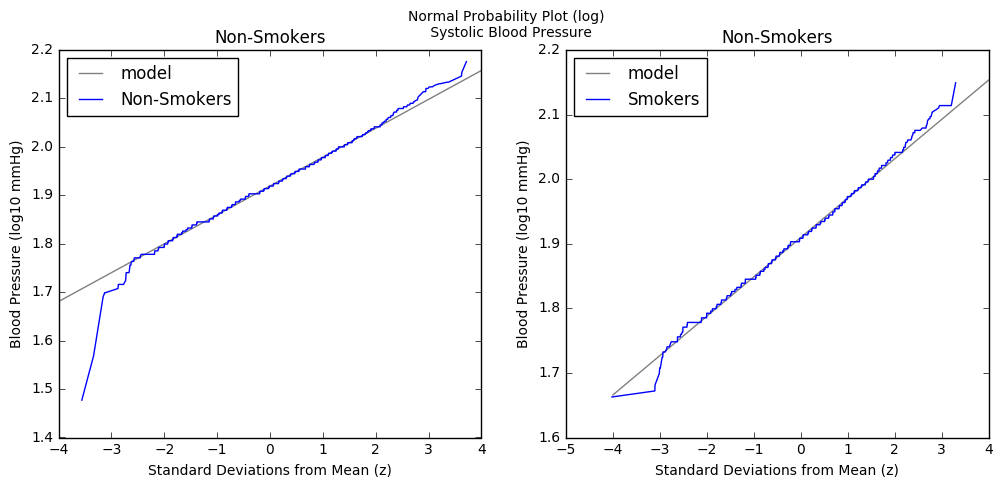

In [29]:
xs=[-4,4]

lfitnsys_xs, lfitnsys_ys = FitLine(xs, inter=log_nonsys.mean(), 
                                 slope=log_nonsys.std())
lfitcsys_xs, lfitcsys_ys = FitLine(xs, inter=log_cursys.mean(), 
                                 slope=log_cursys.std())
logxs_nonsys, logys_nonsys = NormalProbability(log_nonsys)
logxs_cursys, logys_cursys = NormalProbability(log_cursys)


# normal probability plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lfitnsys_xs, lfitnsys_ys, color='grey', label='model')
plt.plot(logxs_nonsys, logys_nonsys, label='Non-Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (log10 mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lfitcsys_xs, lfitcsys_ys, color='grey', label='model')
plt.plot(logxs_cursys, logys_cursys, label='Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (log10 mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')
plt.suptitle('Normal Probability Plot (log) \n Systolic Blood Pressure')

plt.show()

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


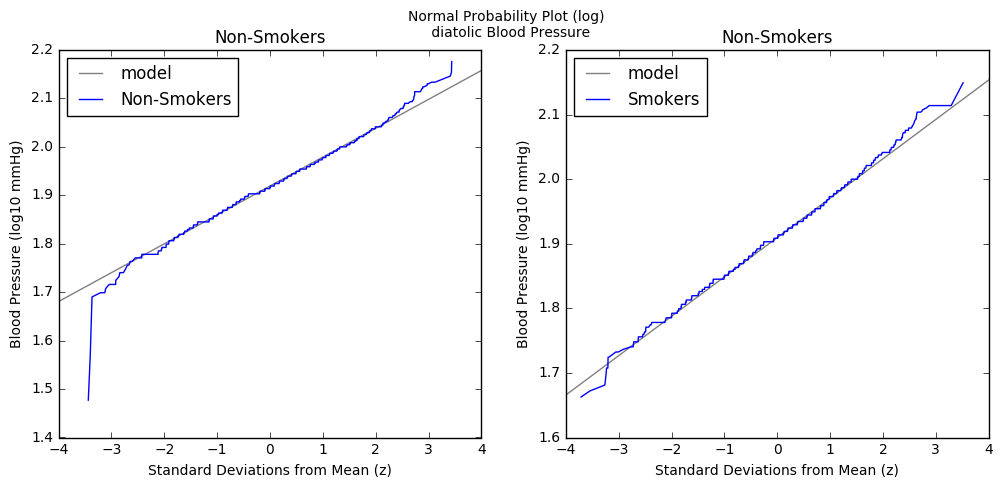

In [30]:
xs=[-4,4]

lfitndia_xs, lfitndia_ys = FitLine(xs, inter=log_nondia.mean(), 
                                 slope=log_nondia.std())
lfitcdia_xs, lfitcdia_ys = FitLine(xs, inter=log_curdia.mean(), 
                                 slope=log_curdia.std())
logxs_nondia, logys_nondia = NormalProbability(log_nondia)
logxs_curdia, logys_curdia = NormalProbability(log_curdia)


# normal probability plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lfitndia_xs, lfitndia_ys, color='grey', label='model')
plt.plot(logxs_nondia, logys_nondia, label='Non-Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (log10 mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lfitcdia_xs, lfitcdia_ys, color='grey', label='model')
plt.plot(logxs_curdia, logys_curdia, label='Smokers')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('Blood Pressure (log10 mmHg)')
plt.title('Non-Smokers')
plt.legend(loc='upper left')
plt.suptitle('Normal Probability Plot (log) \n diatolic Blood Pressure')

plt.show()

Both groups' distribution for systolic and diastolic blood pressure are more appropriately aligned with the lognormal model. Both of their empirical CDF values aligned closely with the lognormal model for both types of blood pressure.

This alignment is further supported by the Normal Probability Plot on a logarthmic scale, which demonstrates alignment by the empirical data and model within 1-2 standard deviations from the mean. 

The Normal Probability Plot on a log scale also indicates that the logarthmic model may not be appropriate for either group when the values of systolic and diastolic blood pressure are greater than +/- 3 standard deviations.

## Probability Density Function

In [31]:
def EstimatedPdf(sample):
    """Computes the KDE/estimates PDF of a given sample."""
    kde = stats.gaussian_kde(sample)
    sample.sort()
    est_pdf = kde.evaluate(sample)
    return est_pdf

In [35]:
def EvalCDF(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample) # float division
    return prob


def RawMoment(sample, k):
    return sum(x**k for x in sample) / len(sample)


def CentralMoment(sample, k):
    mean = RawMoment(sample, 1)
    return sum((x-mean)**k for x in sample) / len(sample)


def StandardizedMoment(sample, k):
    """Normalize the Moment"""
    var = CentralMoment(sample, 2)
    std = math.sqrt(var)
    return CentralMoment(sample, k) / std**k


def Median(sample):
    cdf = {}
    for x in sample:
        cdf[x] = EvalCDF(sample, x)    
    df = pd.DataFrame(cdf.items(), columns=['value', 'cdf'])    
    index = df[df['cdf'] >=0.50]['cdf'].argmin()
    median = df['value'].loc[index]
    return median


def Skewness(sample):
    """Computation of g1 (sampled skewness)."""
    return StandardizedMoment(sample, 3) # 3rd standardized moment


def PearsonMedianSkewness(sample):
    median = Median(sample)
    mean = RawMoment(sample, 1)
    var = CentralMoment(sample, 2)
    std = math.sqrt(var)
    std = pd.Series(sample).std()
    gp = 3 * (mean-median) / std # Pearson Coefficient
    return gp

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


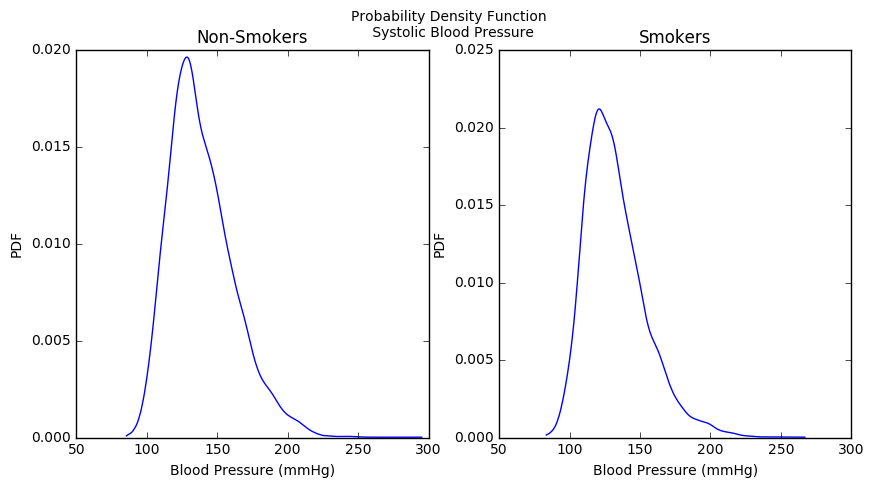

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(non_bp.sysbp[:].sort_values(), EstimatedPdf(non_bp.sysbp[:]))
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('PDF')
plt.title('Non-Smokers')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(cur_bp.sysbp[:].sort_values(), EstimatedPdf(cur_bp.sysbp[:]))
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('PDF')
plt.title('Smokers')
plt.legend(loc='upper right')
plt.suptitle('Probability Density Function \n Systolic Blood Pressure')

plt.show()

Majority of the probability density for systolic blood pressure is concentrated around the mean and within one standard deviation for both groups.

#### Skewness

In [36]:
print "Non-Smoker Systolic BP g1 = %.2f" % Skewness(non_bp.sysbp)
print "Non-Smoker Systolic BP gP = %.2f" % PearsonMedianSkewness(non_bp.sysbp)
print "Smoker Systolic BP g1 = %.2f" % Skewness(cur_bp.sysbp)
print "Smoker Systolic BP gP = %.2f" % PearsonMedianSkewness(cur_bp.sysbp)

Non-Smoker Systolic BP g1 = 0.88
Non-Smoker Systolic BP gP = 0.53
Smoker Systolic BP g1 = 1.04
Smoker Systolic BP gP = 0.50


The positive skewness coefficients indicate that the distribution is skewed right; the right tail appears longer than the left. This is consistent with the probability density function plot of systolic blood pressure for both groups.

Essentially, the mean is greater than the median of systolic blood pressure for both non-smokers and smokers (which we have calculated previously).

The sample skewness coefficient (*g*<sub>1</sub>) is vastly greater than their Pearson's median skewness coefficient counterpart for both groups. This may be due to the fact that sample skewness coefficient is less robust and more susceptible to outliers. Thus, hinting that outliers may be present and greatly impacting the distribution in both groups.

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


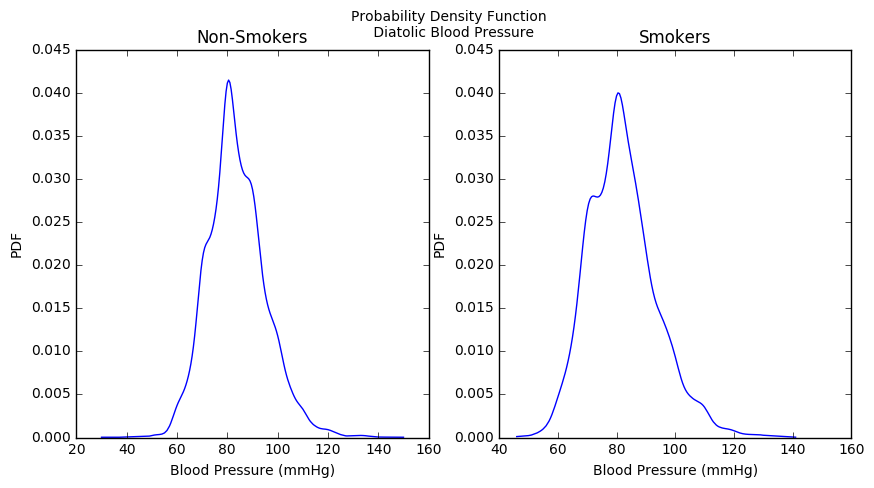

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(non_bp.diabp[:].sort_values(), EstimatedPdf(non_bp.diabp[:]))
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('PDF')
plt.title('Non-Smokers')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(cur_bp.diabp[:].sort_values(), EstimatedPdf(cur_bp.diabp[:]))
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('PDF')
plt.title('Smokers')
plt.legend(loc='upper right')
plt.suptitle('Probability Density Function \n Diatolic Blood Pressure')

plt.show()

Non-smokers' PDF is more densely concentrated around the mean and within one standard deviation. The smokers' PDF is similar as its density of values centers around the mean, but it has a higher spread of values.

In [38]:
print "Non-Smoker Diatolic BP g1 = %.2f" % Skewness(non_bp.diabp)
print "Non-Smoker Diatolic BP gP = %.2f" % PearsonMedianSkewness(non_bp.diabp)
print "Smoker Diatolic BP g1 = %.2f" % Skewness(cur_bp.diabp)
print "Smoker Diatolic BP gP = %.2f" % PearsonMedianSkewness(cur_bp.diabp)

Non-Smoker Diatolic BP g1 = 0.53
Non-Smoker Diatolic BP gP = 0.21
Smoker Diatolic BP g1 = 0.60
Smoker Diatolic BP gP = 0.26


The right-skewed distribution of diastolic blood pressure for both non-smokers and smokers is further reinforced by the skewness coefficients (sample skewness and Pearson's median coefficient). One of the attributes of such distribution is that the mean is greater than the median of systolic blood pressure.

The difference between the sample skewness coefficients (*g*<sub>1</sub>) and Pearson's median coefficient (*g*<sub>p</sub>) illustrate that outliers are present in both groups' systolic blood pressure distribution.

Furthermore, the low magnitude of the Pearson's median coefficient for both groups suggest that the skewedness of their distributions is weak, especially in comparison to groups' respective systolic blood pressure distribution.